In [1]:
#import numpy
import numpy
#import for sigmoid
import scipy.special
#import lib for plotting
import matplotlib.pyplot
#import ensure the plots are inside this notebokk, not an external window
%matplotlib inline

# neural network class
class neuralNetwork:

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input-, hidden-, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices w_input_hidden-> wih; w_hidden_output -> who
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes,self.hnodes))

        #activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
    
        #learning rate
        self.lr = learningrate
        pass
    
    
    # train the neural network
    def train (self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # wih*input= X_hidden
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        #who*hidden = Final
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # sigmoid function on final_input
        final_outputs = self.activation_function(final_inputs)
        
        #error is the (target - actual) hidden -> output
        output_errors = targets - final_outputs
        
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        #input -> hidden
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    

    # query the neural network
    def query (self, inputs_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # wih*input= X_hidden
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #who*hidden = Final
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # sigmoid function on final_input
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        



In [2]:
#number of input, hidden, output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

#set learning rate
learning_rate= 0.15

#create instacnce of  neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)


In [3]:
#open  train file
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list= training_data_file.readlines()
training_data_file.close()

#open  test file
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list= test_data_file.readlines()
test_data_file.close()

In [5]:
import time
import matplotlib.pyplot
%matplotlib inline

# print current date and time
print(time.strftime("%d.%m.%Y %H:%M:%S"))
print("Epoch","Score","Date","Time")

# train & test neural network for each epoch

# epoch is the number times the training data set is used for training
epochs = 2

#scorecard for how well the network performs
scorecard = []

# epoch count init
count_epochs = 0

for e in range(epochs):
    
    # train neural network
    #go through all records in training set
    for record in training_data_list:
        #data split by comma 
        all_values = record.split(',')
        #scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99)+ 0.01
        # create the target output values (all 0.01, except the desired label wich is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        #all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        #train
        n.train(inputs,targets)
        pass
    
    #test neural network
    #go through all the records in the test data set
    for record in test_data_list:
        #split by ','
        all_values_test = record.split(',')
        # correct answer is first value
        correct_label = int(all_values_test[0])
        #print(correct_label, "correct label")
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values_test[1:])/255.0 * 0.99)+ 0.01
        # query the network
        outputs = n.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        #print(label, "network's answer")
        # append correct or incorrect to the list
        if (label == correct_label):
            #network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #answer doesn't match, add 0
            scorecard.append(0)
            pass
        pass
    #epoch count
    count_epochs +=1
    
    #calculate the performance score
    scorecard_array = numpy.asarray(scorecard)
    print(count_epochs, scorecard_array.sum() / scorecard_array.size,(time.strftime("%d.%m.%Y %H:%M:%S")))
    
    #print who in txt
    numpy.savetxt('who_'+str(count_epochs)+'.txt', n.who, delimiter=',')
    
        
    
    pass



24.02.2020 11:17:59
Epoch Score Date Time
1 0.9694 24.02.2020 11:19:26
2 0.97015 24.02.2020 11:20:56


In [6]:
import matplotlib.pyplot
%matplotlib inline

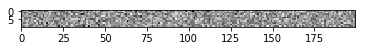

In [7]:
#normalize who
who_max = numpy.amax(n.who)
who_min = numpy.amin(n.who)
who_sum = (who_max**2)**(0.5)+(who_min**2)**(0.5)
epoch_c=1
who_a = n.who + (who_min**2)**(0.5)
scale_who = (who_a/who_sum * 0.99)+ 0.01

#print who
image_array = numpy.asfarray(scale_who).reshape((output_nodes,hidden_nodes))
#export image                             
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
#save image
matplotlib.pyplot.savefig('who_'+str(epoch_c)+'.png', dpi = 1200)

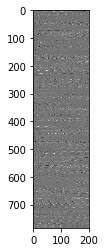

In [96]:
#normalize wih
wih_max = numpy.amax(n.wih)
wih_min = numpy.amin(n.wih)
wih_sum = (wih_max**2)**(0.5)+(wih_min**2)**(0.5)

wih_a = n.wih + (wih_min**2)**(0.5)
scale_wih = (wih_a/wih_sum * 0.99)+ 0.01

#print who
image_array = numpy.asfarray(scale_wih).reshape((input_nodes,hidden_nodes))
#export image                             
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
#save image
matplotlib.pyplot.savefig('wih.png', dpi = 2400)